In [11]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.9.0'

In [7]:
weight = 0.7
bias = 0.3

start =0
end = 1
step = 0.02

X= torch.arange(start, end, step).unsqueeze(dim=1) # make a column
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
train_split = int(0.8 * len(X)) # 80%
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [9]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')
    plt.scatter(test_data, test_labels, c='g', s=4, label='Test Data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    plt.legend(prop= {'size':14})
    

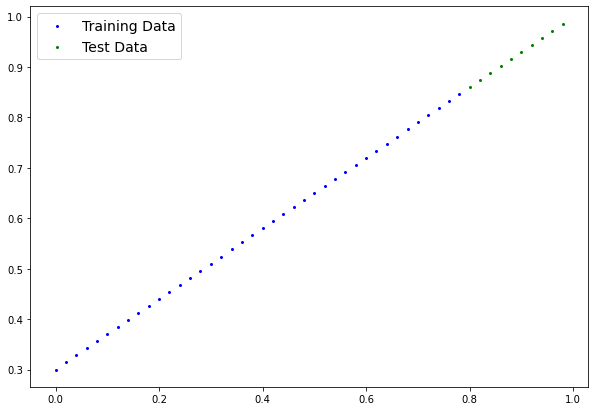

In [12]:
plot_predictions()

In [3]:
import torch
from torch import nn
class LinearRegressionModel (nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype= torch.float,
                                     requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype= torch.float32,
                                             requires_grad=True))
    def __str__(self):
        return f"Implementation Object for Linear Regression"
    
    def forward (self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias   
    

In [4]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [5]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
# making Prediction with model
with torch.inference_mode():
    y_preds = model_0(X_test)


In [14]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


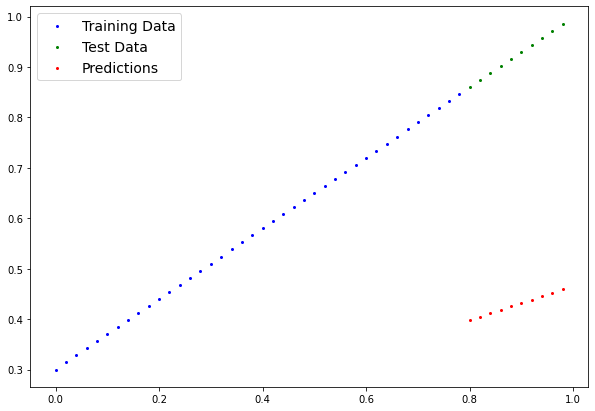

In [15]:
plot_predictions(predictions=y_preds)

#### Creating Loss and Optimizer in PyTorch

#### Loss Functions
pytorch has plenty of built-in loss functions in torch.nn
- torch.nn.L1Loss()
- torch.nn.BCELoss()
#### Optimizer
pytorch optimizers are in torch.optim
- torch.optim.SGD()
- torch.optim.Adam()

In [16]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), 
                            lr =0.01)


In [18]:
epochs = 100
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training
    model_0.train() # put model in training mode
    y_pred = model_0(X_train) # forward pass
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    ### Testing
    model_0.eval() # put model in evaluation mode
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        ## print out what is happening
        if epoch%10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE test loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE test loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE test loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE test loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE test loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE test loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE test loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE test loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE test loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE test loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE test loss: 0.06473556160926819


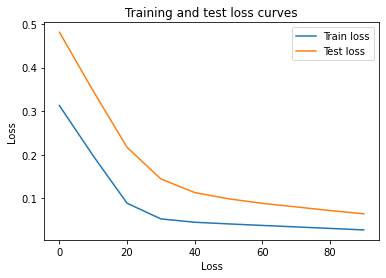

In [19]:
# plot the loss curves
plt.plot(epoch_count, train_loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label= 'Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Loss')
plt.legend()

In [20]:
# learned model parameters
print(f"Model learned weight and bias: {model_0.state_dict()} ")
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

Model learned weight and bias: OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))]) 

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


### Making predictions with Models

- Set the model in evaluation mode
- Make the predictions using inference mode context manager
- All predictions should be made with objects on the same device

In [21]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds    

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

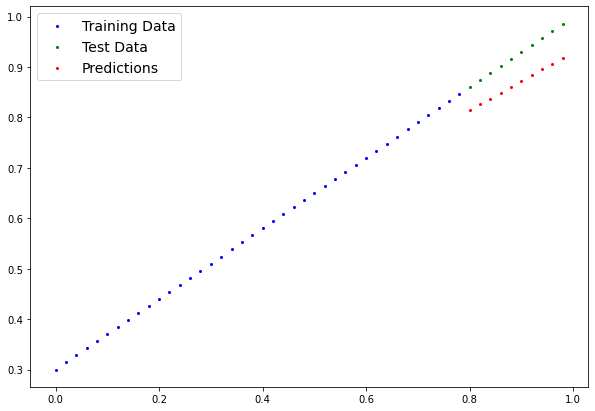

In [23]:
plot_predictions(predictions = y_preds)

### Saving and Reloading the models

- torch.save | Saves a serialized object to disk (Models,  Tensors, Dicts)
- torch.load | Loads objects save using torch.save. Also allow to select device (CPU, GPU)
- torch.nn.Module.load_state_dict | loads a model's parameter dictionary using a saved state_dict object

In [24]:
#Using models by saving and loadin a model's state-dict() 
from pathlib import Path
# Create model directory
Model_Path = Path('models')
Model_Path.mkdir(parents=True, exist_ok=True)
# create mode save path
Model_Name = '01_pytorch_workflow_model_0.pth'
Model_Save_Path = Model_Path / Model_Name
# Save the model state dict
print(f"Saving model to: {Model_Save_Path}") 
torch.save(obj= model_0.state_dict(), f=Model_Save_Path)

Saving model to: models\01_pytorch_workflow_model_0.pth


In [25]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f= Model_Save_Path)) 

<All keys matched successfully>

In [26]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

### Device agnostic Code

In [1]:
import torch
from torch import nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
# create Data
weight = 0.7
bias = 0.3
# Create range values
start = 0
end = 1
step = 0.02
# without unsqueeze, errors will happen later on (shapes within linear layers)
X= torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

In [3]:
train_split = int (0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
class LinearRegressionModelV2 (nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer= nn.Linear(in_features=1, 
                                     out_features=1)
    
    def forward (self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)  

torch.manual_seed(42)      
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [5]:
# check model device
next(model_1.parameters()).device

device(type='cpu')

In [6]:
model_1.to(device)
#next(model_1.parameters()).device

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [7]:
# Training 
#1 - create loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)
# Training Loop
torch.manual_seed(42)
epochs = 1000
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ## Training mode
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Evaluation model
    model_1.eval()
    with torch.inference_mode():
        test_preds = model_1(X_test)
        test_loss = loss_fn(test_preds, y_test)
        
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")    

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


In [8]:
# learned parameters
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

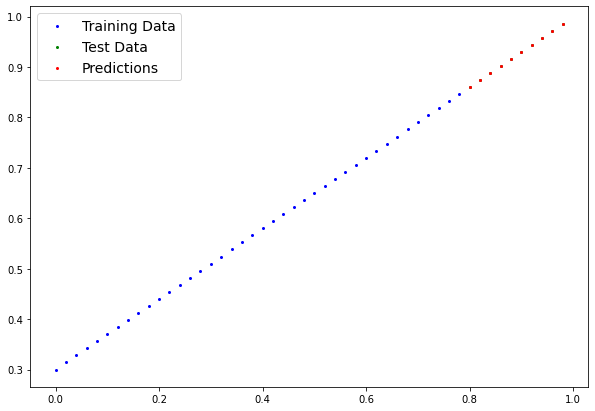

In [12]:
import matplotlib.pyplot as plt
# Prediction Mode
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)

plot_predictions(train_data=X_train.cpu(), 
                    train_labels=y_train.cpu(), 
                    test_data=X_test.cpu(), 
                    test_labels=y_test.cpu(),
                    predictions=y_preds.cpu())    

In [13]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_pytorch_workflow_model_1.pth


In [14]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0
